# **Self-Supervised Learning with SogCLR**

**Author**: Zhuoning Yuan



### **Introduction**

In this tutorial, you will learn how to train a self-supervised model by optimizing [Global Contrastive Loss](https://arxiv.org/abs/2202.12387) (GCL) on CIFAR10/CIFAR100. The original GCL was implementated in Tensorflow and run in TPUs. This tutorial re-implements GCL in PyTorch and GPUs based on [moco's](https://github.com/facebookresearch/moco) codebase. We recommend users to run this notebook on a GPU-enabled environment, e.g., [Google Colab](https://colab.research.google.com/). 

### **Preparation**

Download [source code](https://github.com/Optimization-AI/SogCLR/tree/cifar) and extract it to local folder

In [1]:
#%% mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
path='/content/gdrive/MyDrive/CSCE_689_Optimization_Project' 
os.chdir(path)
print(os.getcwd())

/content/gdrive/MyDrive/CSCE_689_Optimization_Project


In [ ]:
#!git clone -b cifar https://github.com/Optimization-AI/SogCLR.git
#!mv ./SogCLR/* ./
#!rm -r /content/gdrive/MyDrive/CSCE_689_Optimization_Project/SogCLR

Cloning into 'SogCLR'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 193 (delta 41), reused 51 (delta 11), pack-reused 98
Receiving objects: 100% (193/193), 928.45 KiB | 7.43 MiB/s, done.
Resolving deltas: 100% (61/61), done.
rm: cannot remove '/content/SogCLR': No such file or directory


### **Self-Supervised Pre-Training on CIFAR10/CIFAR100**


Below are two examples for self-supervised pre-training of a ResNet-50 model on CIFAR10 on a single GPU. The first time you run the scripts, datasets will be automatically downloaded to `/data/`. 
- By default, we use linear learning rate scaling, e.g., $\text{LearningRate}=1.0\times\text{BatchSize}/256$, [LARS](https://arxiv.org/abs/1708.03888) optimizer and a weight decay of 1e-4. For temperature parameter $\tau$, we use a fixed value of 0.3. For GCL, gamma (γ in the paper) is an additional parameter for maintaining moving average estimator, the default value is 0.9. 
- By default, `CIFAR10` is used for experiments. To pretrain on CIFAR100, you can set `--data_name=cifar100`. In this codebase, only `CIFAR10/CIFAR100` is supported, however, you can modify the dataloader to support other datasets.

**Training with ResNet-50 using DCL (SogCLR)**

We use batch size of 64 and train 400 epochs for pretraining on ResNet-50 with a 2-layer non-linear projection head on top of backbone encoder with the hidden size of 128. You can also increase the number of workers to accelerate the training speed, e.g., `--workers=32`
 

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python train.py \
  --lr=1.0 --learning-rate-scaling=linear \
  --epochs=400 --batch-size=64 \
  --loss_type dcl \
  --gamma 0.9 \
  --workers 32 \
  --wd=1e-4 \
  --data_name cifar10 \
  --save_dir ./saved_models2/ \
  --print-freq 1000

Use GPU: 0 for training
pretraining on cifar10
=> creating model 'resnet50'
cifar head: True
initial learning rate: 0.25
20221013_cifar10_resnet50_sogclr-128-2048_bz_64_E400_WR10_lr_0.250_linear_wd_0.0001_t_0.3_g_0.9_lars
Files already downloaded and verified
image1: torch.Size([64, 3, 32, 32])
Epoch: [0][  0/781]	Time 11.321 (11.321)	Data  2.986 ( 2.986)	LR 0.0000e+00 (0.0000e+00)	Loss -1.0009e-01 (-1.0009e-01)
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: torch.Size([64, 3, 32, 32])
image1: 

**Training with ResNet-50 using CL (SimCLR)**

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python train.py \
  --lr=1.0 --learning-rate-scaling=linear \
  --epochs=400 --batch-size=64 \
  --loss_type cl \
  --workers 2 \
  --wd=1e-4 \
  --data_name cifar10 \
  --save_dir ./saved_models/ \
  --print-freq 1000

Use GPU: 0 for training
pretraining on cifar10
=> creating model 'resnet50'
cifar head: True
initial learning rate: 0.25
Traceback (most recent call last):
  File "train.py", line 383, in <module>
    main()
  File "train.py", line 135, in main
    main_worker(args.gpu, ngpus_per_node, args)
  File "train.py", line 173, in main_worker
    model = model.cuda(args.gpu)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 689, in cuda
    return self._apply(lambda t: t.cuda(device))
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 579, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 579, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 602, in _apply
    param_applied = fn(param)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 689, in <lambda>
    return self._apply(lamb

### **Linear Classification**

By default, we use momentum-SGD without weight decay and a batch size of 1024 for linear classification on frozen features/weights. In this stage, it runs 90 epochs.

In [ ]:
!python lincls.py \
  --workers 2 \
  --pretrained ./saved_models/cifar10_resnet50_sogclr-128-2048_bz_64_E400_WR10_lr_0.250_linear_wd_0.0001_t_0.3_g_0.9_lars/checkpoint_0399.pth.tar \
  --data_name cifar10 \
  --save_dir ./saved_models2/ \
  --epochs 90

=> creating model 'resnet50'
Dataset: cifar10
Cifar head: True
=> loading checkpoint './saved_models/cifar10_resnet50_sogclr-128-2048_bz_64_E400_WR10_lr_0.250_linear_wd_0.0001_t_0.3_g_0.9_lars/checkpoint_0399.pth.tar'
=> loaded pre-trained model './saved_models/cifar10_resnet50_sogclr-128-2048_bz_64_E400_WR10_lr_0.250_linear_wd_0.0001_t_0.3_g_0.9_lars/checkpoint_0399.pth.tar'
linear_eval_cifar10_resnet50_sogclr-128-2048_bz_64_E400_WR10_lr_0.250_linear_wd_0.0001_t_0.3_g_0.9_lars
Files already downloaded and verified
Files already downloaded and verified
Epoch: [0][ 0/49]	Time  9.778 ( 9.778)	Data  2.143 ( 2.143)	Loss 2.3085e+00 (2.3085e+00)	Acc@1   6.84 (  6.84)	Acc@5  48.05 ( 48.05)
Test: [ 0/10]	Time  1.326 ( 1.326)	Loss 3.1278e-01 (3.1278e-01)	Acc@1  89.16 ( 89.16)	Acc@5  99.61 ( 99.61)
 * Acc@1 88.030 Acc@5 99.690
 * Best Acc@1:88.030
Epoch: [1][ 0/49]	Time  1.732 ( 1.732)	Data  0.874 ( 0.874)	Loss 4.2879e-01 (4.2879e-01)	Acc@1  84.96 ( 84.96)	Acc@5  99.32 ( 99.32)
Test: [ 0/10]	Tim

In [ ]:
from PIL import Image
image = Image.open("./saved_models2/TestAcc.png","r")
image.show()

Populating the interactive namespace from numpy and matplotlib


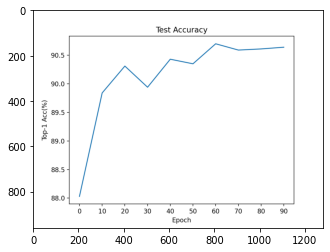

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("./saved_models2/TestAcc.png","r")
imgplot = plt.imshow(img)
plt.show()

### **Benchmarks**

The following results are linear evaluation accuracy on CIFAR10 testing dataset. All results are based on a batch size of 64 for 400-epoch pretraining.

| Method | BatchSize |Epoch | Linear eval. |
|:----------:|:--------:|:--------:|:--------:|
| SimCLR | 64   |   400 |  90.66    |
| SogCLR | 64   |   400 | 91.78  |


### **Reference**
If you find this tutorial helpful, please cite our paper:

<pre>
@inproceedings{yuan2022provable,
  title={Provable stochastic optimization for global contrastive learning: Small batch does not harm performance},
  author={Yuan, Zhuoning and Wu, Yuexin and Qiu, Zi-Hao and Du, Xianzhi and Zhang, Lijun and Zhou, Denny and Yang, Tianbao},
  booktitle={International Conference on Machine Learning},
  pages={25760--25782},
  year={2022},
  organization={PMLR}
}
</pre>

# Try

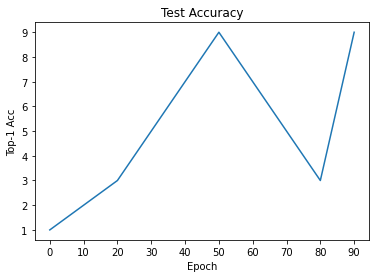

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y=[1,2,3,5,7,9,7,5,3,9]
x=np.arange(0,100,10)
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+1, 10))
plt.xlabel('Epoch')
plt.ylabel('Top-1 Acc')
plt.title('Test Accuracy')
plt.show()


In [ ]:
!CUDA_VISIBLE_DEVICES=0 python train.py \
  --lr=1.0 --learning-rate-scaling=linear \
  --epochs=400 --batch-size=64 \
  --loss_type dcl \
  --gamma 0.9 \
  --workers 32 \
  --wd=1e-4 \
  --data_name cifar10 \
  --save_dir ./saved_models/ \
  --print-freq 1000

Use GPU: 0 for training
pretraining on cifar10
=> creating model 'resnet50'
cifar head: True
initial learning rate: 0.25
20221013_cifar10_resnet50_sogclr-128-2048_bz_64_E400_WR10_lr_0.250_linear_wd_0.0001_t_0.3_g_0.9_lars
Files already downloaded and verified
Epoch: [0][  0/781]	Time 11.877 (11.877)	Data  3.429 ( 3.429)	LR 0.0000e+00 (0.0000e+00)	Loss 4.7079e-02 (4.7079e-02)
Epoch: [1][  0/781]	Time  6.264 ( 6.264)	Data  3.257 ( 3.257)	LR 2.5000e-02 (2.5000e-02)	Loss -2.3343e-01 (-2.3343e-01)
Epoch: [2][  0/781]	Time  5.753 ( 5.753)	Data  3.119 ( 3.119)	LR 5.0000e-02 (5.0000e-02)	Loss -3.5563e-01 (-3.5563e-01)
Epoch: [3][  0/781]	Time  6.966 ( 6.966)	Data  3.703 ( 3.703)	LR 7.5000e-02 (7.5000e-02)	Loss -5.6335e-01 (-5.6335e-01)
Epoch: [4][  0/781]	Time  7.245 ( 7.245)	Data  4.089 ( 4.089)	LR 1.0000e-01 (1.0000e-01)	Loss -6.8456e-01 (-6.8456e-01)
Epoch: [5][  0/781]	Time  6.930 ( 6.930)	Data  4.350 ( 4.350)	LR 1.2500e-01 (1.2500e-01)	Loss -7.6171e-01 (-7.6171e-01)
Epoch: [6][  0/781]	Ti